In [27]:
%matplotlib inline

In [1]:
import sys
import os
sys.path.append(os.path.abspath('.'))

In [3]:
from pages.A_Explore_Preprocess_Dataset import load_dataset
filepath = "../Loan_default.csv"
df = load_dataset(filepath)
df.head()

2025-05-11 22:59:08.463 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-11 22:59:08.464 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [6]:
import numpy as np
# print basic statistics about dataset - number of features, distribution of target variable
print(f"Number of rows: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

print(f"Number of numeric features: {len(numeric_cols)}")
print(f"Number of categorical features: {len(categorical_cols)}")

num_rows_with_missing = df.isnull().any(axis=1).sum()
print(f"% of rows with missing values: {num_rows_with_missing/df.shape[0] * 100:.2f}%")

print("Counts of 0 and 1:", df['Default'].value_counts())

Number of rows: 255347
Number of features: 18
Number of numeric features: 10
Number of categorical features: 8
% of rows with missing values: 0.00%
Counts of 0 and 1: Default
0    225694
1     29653
Name: count, dtype: int64


In [ ]:
# for each categorical column, print how many unique values it has

print(len(categorical_cols))
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts())
    print()

8
LoanID: 255347 unique values
LoanID
I38PQUQS96    1
WGB0GD3150    1
XATSFC5YHN    1
CQXDW5VBAG    1
6AIVUNAJG8    1
             ..
ZBK3GDL2LI    1
SP7XY2LPYA    1
Q2DO8ENMV1    1
5EXD8N4MT4    1
ZTH91CGL0B    1
Name: count, Length: 255347, dtype: int64

Education: 4 unique values
Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64

EmploymentType: 4 unique values
EmploymentType
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: count, dtype: int64

MaritalStatus: 3 unique values
MaritalStatus
Married     85302
Divorced    85033
Single      85012
Name: count, dtype: int64

HasMortgage: 2 unique values
HasMortgage
Yes    127677
No     127670
Name: count, dtype: int64

HasDependents: 2 unique values
HasDependents
Yes    127742
No     127605
Name: count, dtype: int64

LoanPurpose: 5 unique values
LoanPurpose
Business     51298
Home         51286
Education    51005
Other    

In [9]:
df = df.drop(columns="LoanID")

In [ ]:
from pages.A_Explore_Preprocess_Dataset import one_hot_encode_feature 
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df = one_hot_encode_feature(df, categorical_cols)

In [13]:
print(df.columns)

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Default',
       'Education_Bachelor's', 'Education_High School', 'Education_Master's',
       'Education_PhD', 'EmploymentType_Full-time', 'EmploymentType_Part-time',
       'EmploymentType_Self-employed', 'EmploymentType_Unemployed',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'HasMortgage_No', 'HasMortgage_Yes',
       'HasDependents_No', 'HasDependents_Yes', 'LoanPurpose_Auto',
       'LoanPurpose_Business', 'LoanPurpose_Education', 'LoanPurpose_Home',
       'LoanPurpose_Other', 'HasCoSigner_No', 'HasCoSigner_Yes'],
      dtype='object')


In [15]:
features = [col for col in df.columns if col != 'Default']
X = df[features]
y = df['Default']

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y.values, test_size=0.3, random_state=42
)

In [31]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_val)

# Calculate metrics
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

y_pred_train = model.predict(X_train)


mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print("Train Mean Squared Error:", mse_train)
print("Train R2 Score:", r2_train)



Mean Squared Error: 0.09435128616396757
R2 Score: 0.08328206096334156
Train Mean Squared Error: 0.09419525903557581
Train R2 Score: 0.08122091412482702


In [32]:
log_reg_model = LogisticRegression(penalty="l2", C=1.0, max_iter=500, class_weight="balanced")

log_reg_model.fit(X_train, y_train)

y_pred = model.predict(X_val)

# Calculate metrics
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

y_pred_train = model.predict(X_train)


mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print("Train Mean Squared Error:", mse_train)
print("Train R2 Score:", r2_train)



Mean Squared Error: 0.09435128616396757
R2 Score: 0.08328206096334156
Train Mean Squared Error: 0.09419525903557581
Train R2 Score: 0.08122091412482702


In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

def mean_per_class_accuracy(y_true, y_pred, n_classes=None, labels=None):
    """ Computes mean per-class accuracy

    Args:
        y_true:    the true labels
        y_pred:    the predicted labels
        n_classes: the number of classes, optional. If not provided, the number of
                   unique classes or length of `labels` if provided.
        labels:    the unique labels, optional. If not provided, unique labels are used
                   if `n_classes` not provided, otherwise range(n_classes).

    Returns:
        mean per-class accuracy
    """
    if n_classes is None:
        if labels is None:
            labels = np.unique(y_true)
        n_classes = len(labels)
    elif labels is None:
        labels = np.arange(n_classes)
    elif len(labels) != n_classes:
        raise ValueError('Number of classes specified ({}) differs from '
                         'number of labels ({}).'.format(n_classes, len(labels)))
    acc = 0.
    for c in labels:
        c_mask = (y_true == c)
        c_count = c_mask.sum()
        if c_count:  # Avoid division by 0
            # Add accuracy for class c
            acc += np.logical_and(c_mask, (y_pred == c)).sum() / c_count
    # Mean accuracy per class
    return acc / n_classes


def compute_and_plot_scores(sim, gt, model_name):
    # Compute PR-curve
    precision, recall, thresholds = precision_recall_curve(gt, sim)
    average_precision = average_precision_score(gt, sim)
    print('Average Precision: {}'.format(average_precision))

    best_macc = 0.
    best_mthresh = None
    # Compute the best MPC-accuracy at hard-coded thresholds
    thresholds = np.arange(0, 1.02, 0.02)
    for thresh in thresholds:
        sim_thresh = np.zeros_like(sim)
        sim_thresh[sim >= thresh] = 1
        macc = mean_per_class_accuracy(gt, sim_thresh, n_classes=2)
        if macc > best_macc:
            best_macc = macc
            best_mthresh = thresh


    best_f1 = 0.0
    best_f1_thresh = None

    # Calculate F1 score for each threshold
    for thresh in thresholds:
        sim_thresh = np.zeros_like(sim)
        sim_thresh[sim >= thresh] = 1
        f1 = f1_score(gt, sim_thresh)
        if f1 > best_f1:
            best_f1 = f1
            best_f1_thresh = thresh

    

    sim_mthresh = np.zeros_like(sim)
    sim_mthresh[sim >= best_mthresh] = 1
    precision_at_mthresh = precision_score(gt, sim_mthresh)
    recall_at_mthresh = recall_score(gt, sim_mthresh)
    print('Best MPC-ACC (thresh={}): {}'.format(best_mthresh, best_macc))
    print('Precision (thresh={}): {}'.format(best_mthresh, precision_at_mthresh))
    print('Recall (thresh={}): {}'.format(best_mthresh, recall_at_mthresh))

    sim_f1thresh = np.zeros_like(sim)
    sim_f1thresh[sim >= best_f1_thresh] = 1
    precision_at_f1thresh = precision_score(gt, sim_f1thresh)
    recall_at_f1thresh = recall_score(gt, sim_f1thresh)
    print("Best F1 Score (thresh={}): {}".format(best_f1_thresh, best_f1))
    print('Precision (thresh={}): {}'.format(best_f1_thresh, precision_at_f1thresh))
    print('Recall (thresh={}): {}'.format(best_f1_thresh, recall_at_f1thresh))

    plt.step(recall, precision, color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,
                     color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.3f}'.format(
        average_precision))
    plt.savefig('precision-recall_curve_{}.png'.format(model_name),
                format='png', dpi=150)
    plt.show()
    


Average Precision: 0.3097737724135949
Best MPC-ACC (thresh=0.16): 0.6847415869981088
Precision (thresh=0.16): 0.2353253110340608
Recall (thresh=0.16): 0.6464589870013447
Best F1 Score (thresh=0.2): 0.3615025522446665
Precision (thresh=0.2): 0.29599199828534684
Recall (thresh=0.2): 0.4642536978933214


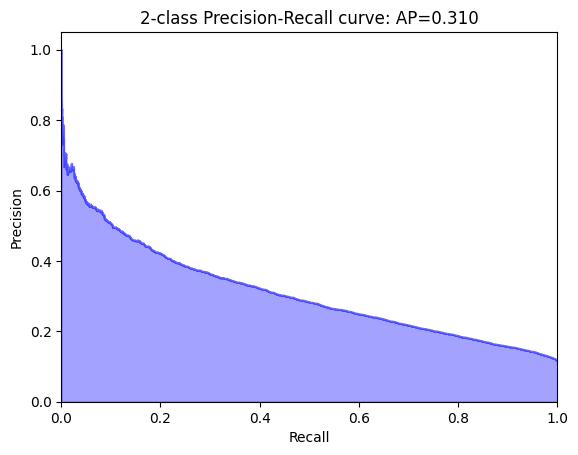

In [28]:
compute_and_plot_scores(y_pred, y_val, 'model_name=linear regression')